In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data=pd.read_csv('mnistDataset/mnist_train.csv')
test=pd.read_csv('mnistDataset/mnist_test.csv')
# print(data.head(5))
# print(test.head(5))

### Data Preprocessing

In [23]:
data=np.array(data)
test=np.array(test)
Y=data[:,0]
X=data[:,1:]
testY=test[:,0]
testX=test[:,1:]

print(X.shape)
print(Y.shape)
print(testX.shape)
print(testY.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


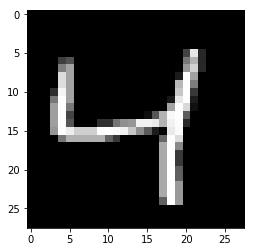

In [42]:
def drawImg(x):
    img=x.reshape(28,28)
    plt.imshow(img,cmap='gray')
drawImg(X[8])

## KNN

In [39]:
def distance(xQuery,x):
    return np.sqrt(sum((x-xQuery)**2))

def knn(xQuery,X,Y,k):
    distVector=[]
    for i in range(X.shape[0]):
        d=distance(xQuery,X[i])
        distVector.append((d,Y[i]))

    distVector=sorted(distVector)
    distVector=np.array(distVector)
    distVector=distVector[:k]
    distVector=distVector[:,1]
    
    U=np.unique(distVector,return_counts=True)
    index=U[1].argmax()
    return U[0][index]

In [59]:
def accuracy(testX,testY,X,Y):
    countTrue=0
    for i in range(testX.shape[0]):
        predLabel=knn(testX[1],X,Y,6)
        if predLabel==testY[i]:
            countTrue+=1
    return countTrue/testX.shape[0]

print(accuracy(testX,testY,X,Y))

KeyboardInterrupt: 